In [5]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
from sklearn.model_selection import train_test_split

In [8]:
# Reading the dataset
LR_Dataset = pd.read_csv("letter-recognition.csv")
LR_Dataset.shape
LR_Dataset

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [3]:
LR_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   lettr   20000 non-null  object
 1   x-box   20000 non-null  int64 
 2   y-box   20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   high    20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   x-bar   20000 non-null  int64 
 7   y-bar   20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybr   20000 non-null  int64 
 12  xy2br   20000 non-null  int64 
 13  x-ege   20000 non-null  int64 
 14  xegvy   20000 non-null  int64 
 15  y-ege   20000 non-null  int64 
 16  yegvx   20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [4]:
LR_Dataset.shape

(20000, 17)

In [5]:
# Information related to the numeric data
LR_Dataset.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [6]:
# Initialising individual and target data in Dataset
Indv_Data = LR_Dataset.select_dtypes(include = ['int64', 'float64']).columns
print(Indv_Data)
Target_Data = LR_Dataset.select_dtypes(include = ['object']).columns
print(Target_Data)

Index(['x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar',
       'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx'],
      dtype='object')
Index(['lettr'], dtype='object')


Text(0.5, 1.0, 'Correlation Matrix')

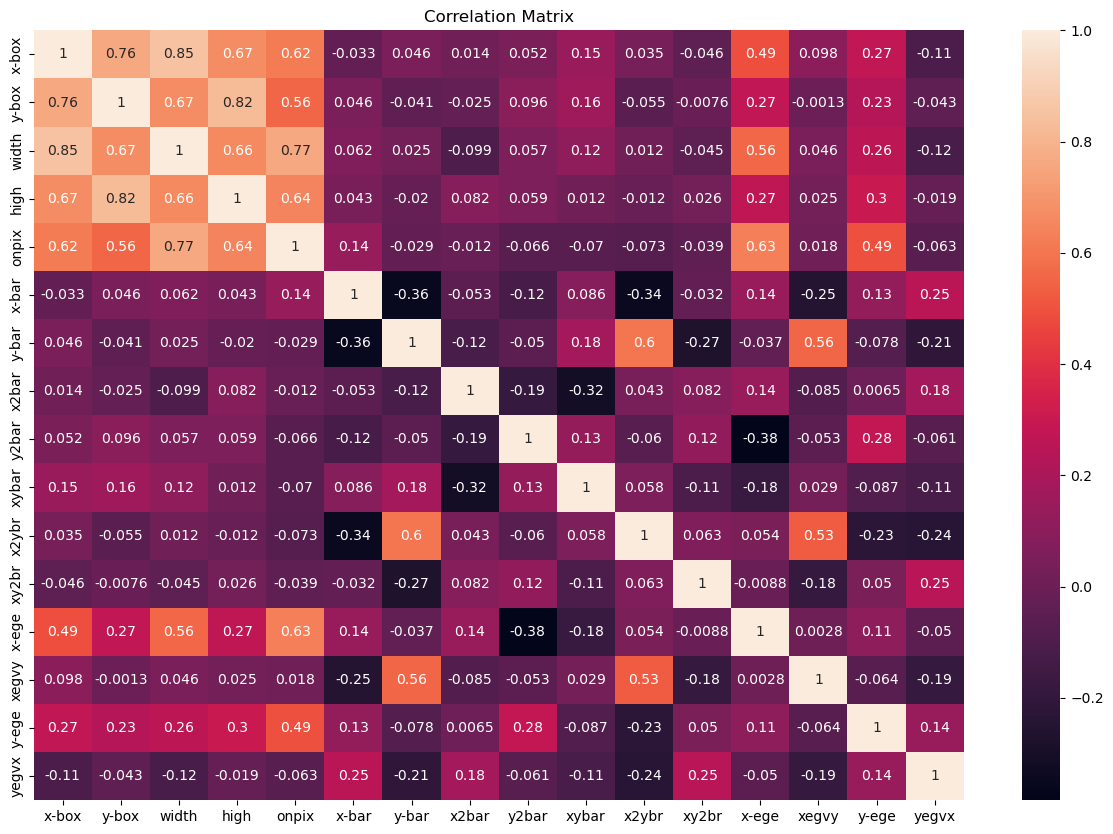

In [7]:
# Correlation Matrix
Figure = plt.figure(figsize=(15, 10))
corr = sns.heatmap(LR_Dataset.corr(),annot = True)
corr.set_title('Correlation Matrix')

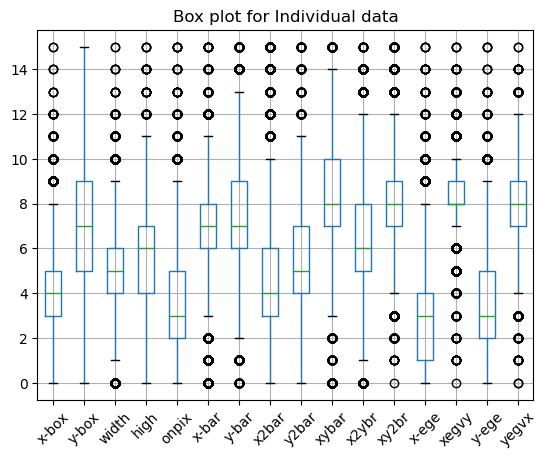

In [8]:
# Box Plot
LR_Dataset.boxplot()
plt.xticks(rotation = 45)
plt.title("Box plot for Individual data")
plt.show()

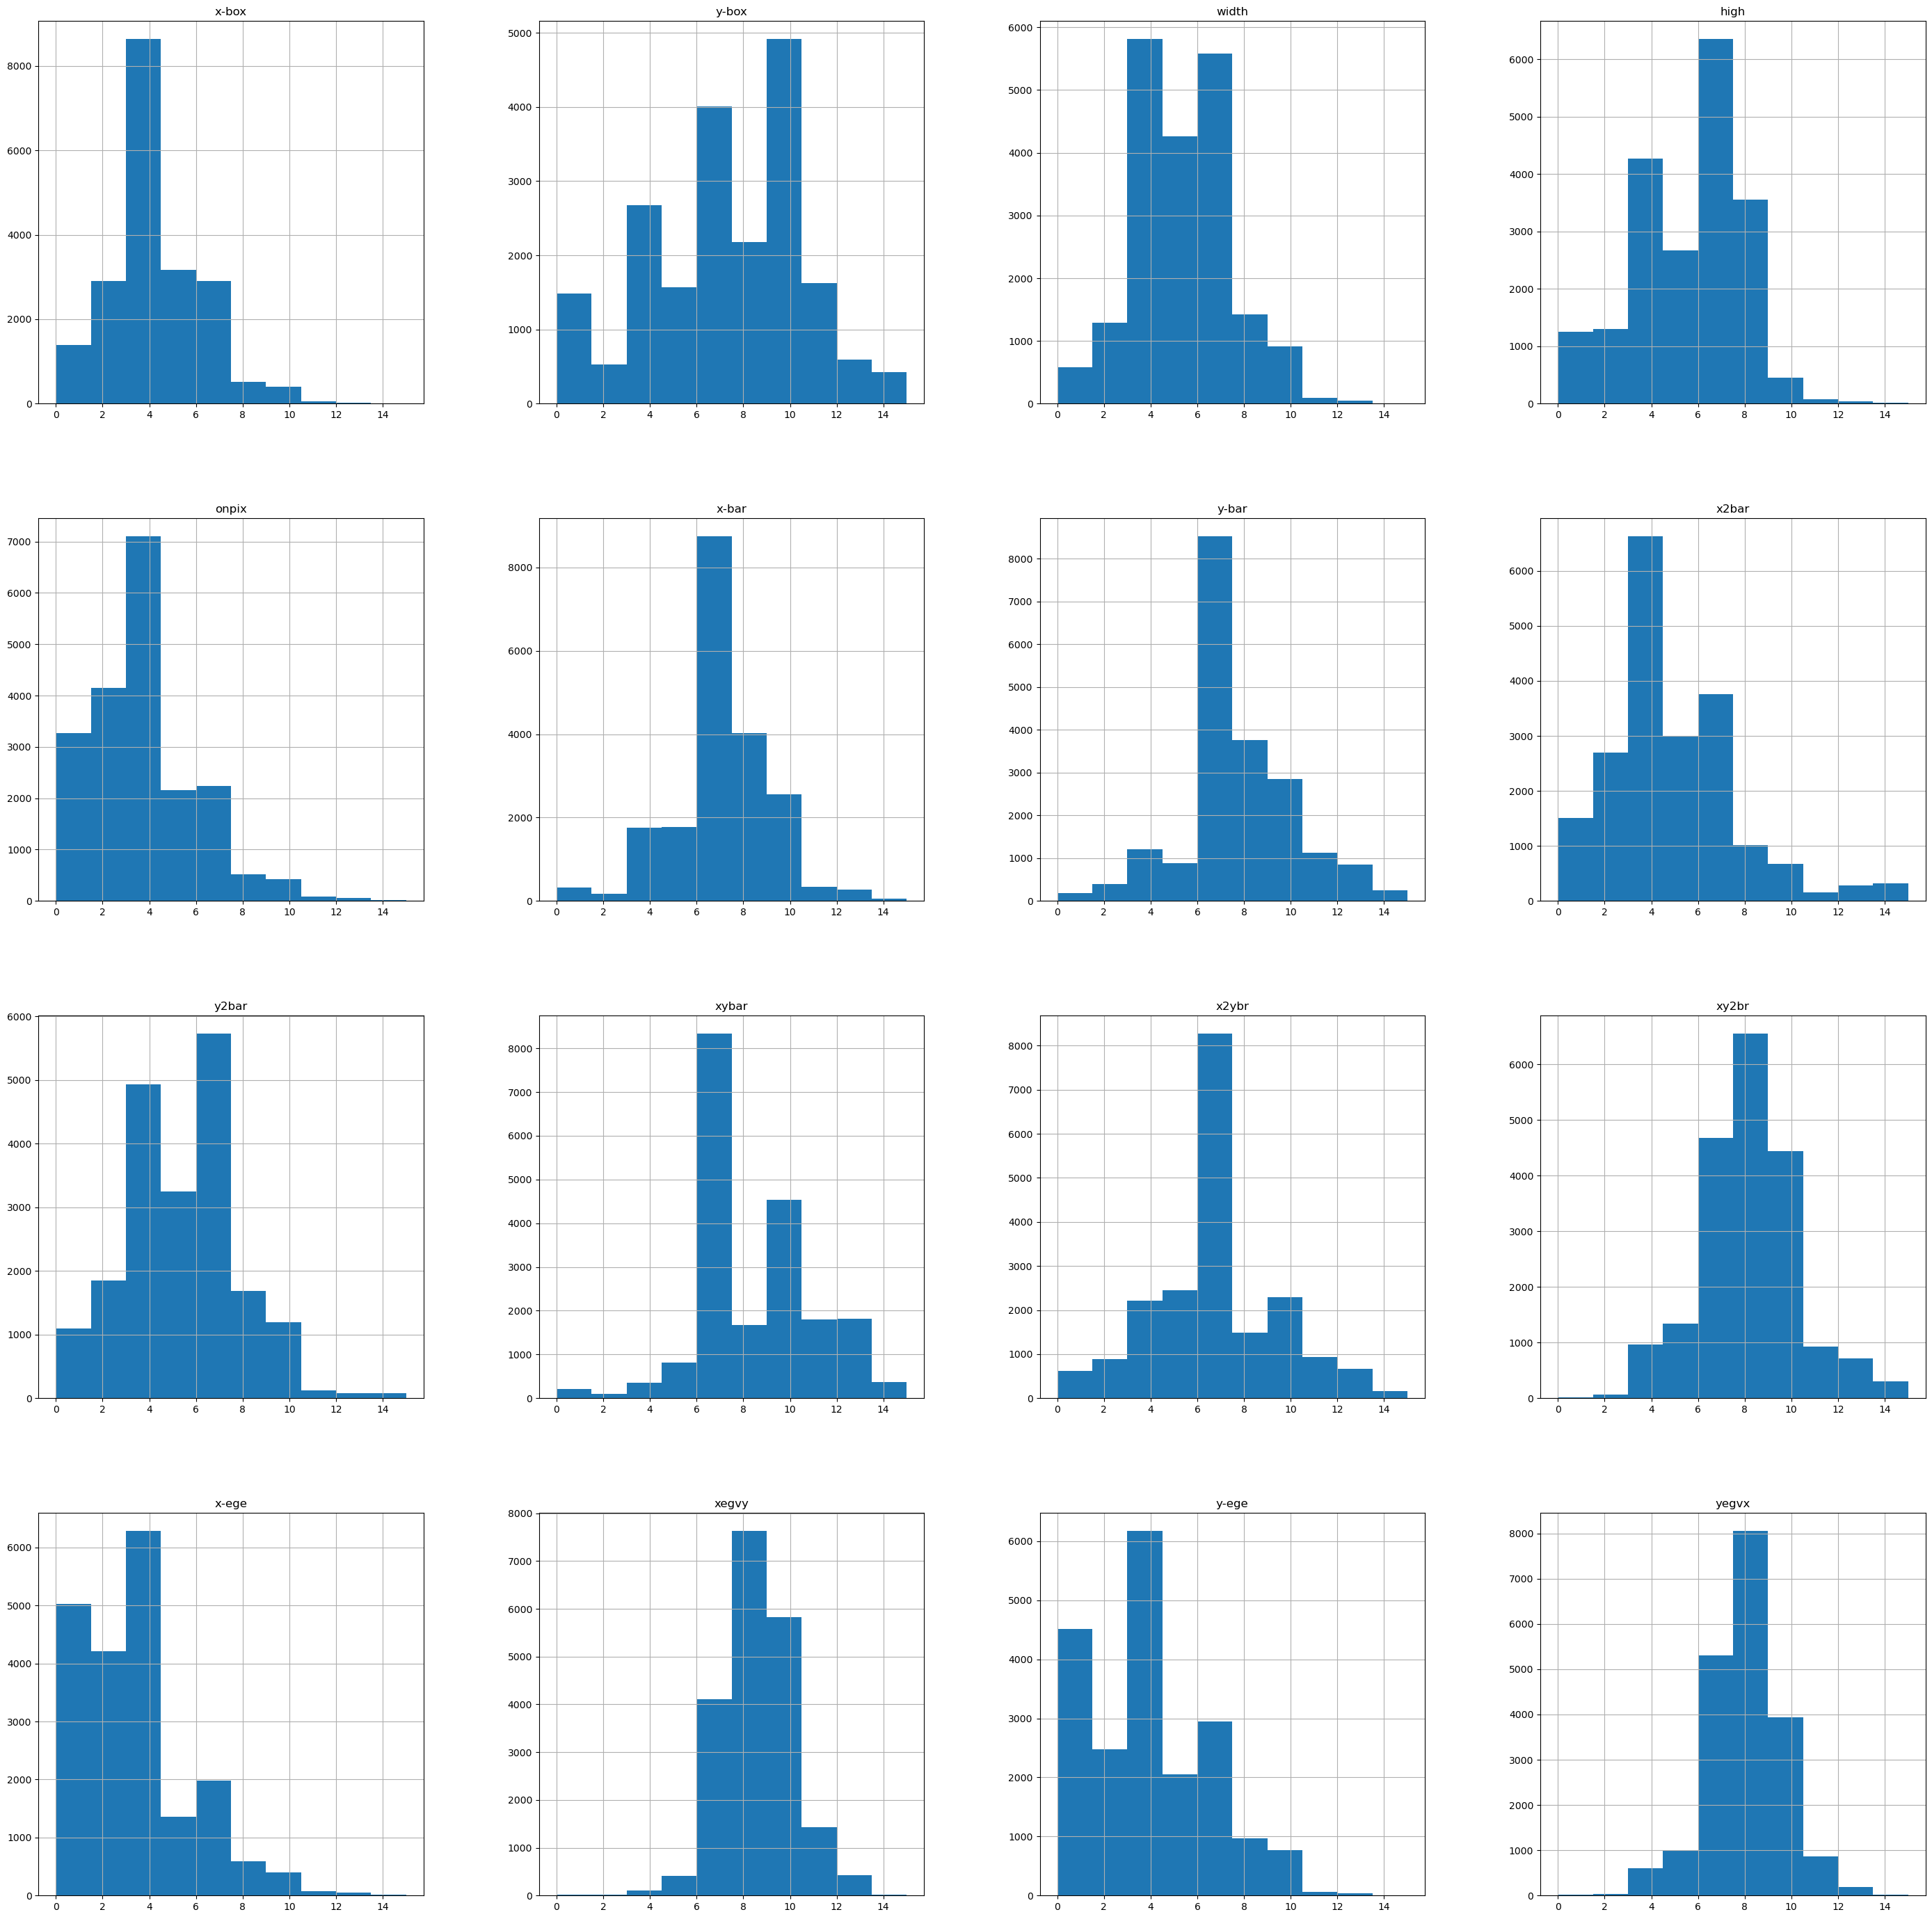

In [9]:
# Histogram plot for Individual Data
LR_Dataset[Indv_Data].hist(figsize=(35,35))
plt.show()

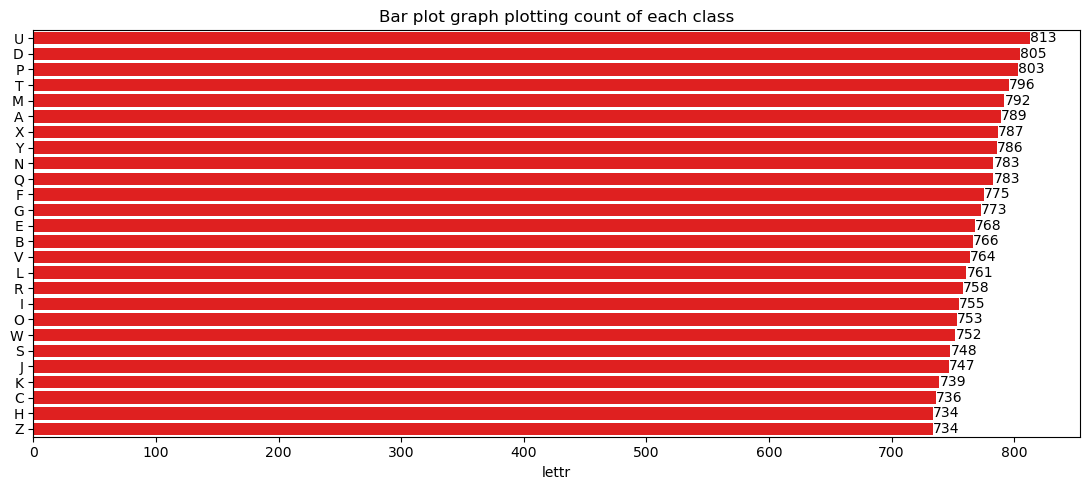

In [10]:
#plotting bar graph count for class
for data in Target_Data:
    plt.figure(figsize=(11,5))    
    sns.barplot(x = LR_Dataset[data].value_counts(), y = LR_Dataset[data].value_counts().index, data = LR_Dataset,color = 'Red' )  
    for i, count in enumerate(LR_Dataset[data].value_counts()):
        plt.text(count, i, str(count), ha='left', va='center')
    plt.title('Bar plot graph plotting count of each class')    
    plt.tight_layout()

In [11]:
from sklearn.preprocessing import MinMaxScaler

X = LR_Dataset[Indv_Data]
Y = LR_Dataset[Target_Data]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Perform Min-Max scaling on the dataset
X_normalized = scaler.fit_transform(X)

# Convert the scaled array back to a DataFrame
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

X_normalized.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.268237,0.469033,0.341457,0.358163,0.233723,0.459840,0.500030,0.308573,0.345243,0.552137,0.430267,0.528600,0.203073,0.555923,0.246117,0.520080
std,0.127547,0.220304,0.134305,0.150759,0.146031,0.135069,0.155024,0.179998,0.158722,0.165898,0.175405,0.138708,0.155503,0.103115,0.171138,0.107831
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.333333,0.266667,0.266667,0.133333,0.400000,0.400000,0.200000,0.266667,0.466667,0.333333,0.466667,0.066667,0.533333,0.133333,0.466667
50%,0.266667,0.466667,0.333333,0.400000,0.200000,0.466667,0.466667,0.266667,0.333333,0.533333,0.400000,0.533333,0.200000,0.533333,0.200000,0.533333
75%,0.333333,0.600000,0.400000,0.466667,0.333333,0.533333,0.600000,0.400000,0.466667,0.666667,0.533333,0.600000,0.266667,0.600000,0.333333,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
#splitting of data for train and test
from sklearn.model_selection import train_test_split

# Separate the features and target variable

X = LR_Dataset.drop("lettr", axis=1)
Y = LR_Dataset["lettr"]

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Split data into train and test sets
X = LR_Dataset[['x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy','y-ege', 'yegvx']]
y = LR_Dataset['lettr']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Calculate accuracy on test set
y_pred = knn.predict(X_test)
accuracy = knn.score(X_test, y_test)
print(accuracy)

G:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

0.9481666666666667


In [14]:
from sklearn.svm import SVC
# Train an SVM model
svm = SVC()  
svm.fit(X_train, y_train)

# Predict on the test set and calculate accuracy 
y_pred = svm.predict(X_test)  
accuracy = svm.score(X_test, y_test)
print(accuracy)

0.9168333333333333


In [15]:
from sklearn.svm import SVC
# Train an SVM model
svm = SVC()  
svm.fit(X_train, y_train)

# Predict on the test set and calculate accuracy 
y_pred = svm.predict(X_test)  
accuracy = svm.score(X_test, y_test)
print(accuracy)

0.9168333333333333


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.001, 0.0001]}
grid = GridSearchCV(SVC(), param_grid, cv=5)  
grid.fit(X_train, y_train)
print(grid.best_params_) 
print(grid.best_score_)

{'C': 10, 'gamma': 0.1}
0.9672142857142857


In [17]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=500, max_depth=10)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=500)